In [1]:
# Librairies utiles
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from IPython.core.display import Image, display
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.grid_search import GridSearchCV

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

import warnings
# suppression des messages d'erreurs
warnings.filterwarnings('ignore')


/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:

hidden_layer_sizes = []

i_max=10
j_max=10

a = np.array(range (1,i_max))
b = np.array(range (1,j_max))

ecart_i = 100
ecart_j = 100

for i in a : 
    hidden_layer_sizes.append((i*ecart_i,))
    for j in b :
        hidden_layer_sizes.append((i*ecart_i,j*ecart_j))
        
# affichage des couches de neurones que l'on va tester
hidden_layer_sizes

[(100,),
 (100, 100),
 (100, 200),
 (100, 300),
 (100, 400),
 (100, 500),
 (100, 600),
 (100, 700),
 (100, 800),
 (100, 900),
 (200,),
 (200, 100),
 (200, 200),
 (200, 300),
 (200, 400),
 (200, 500),
 (200, 600),
 (200, 700),
 (200, 800),
 (200, 900),
 (300,),
 (300, 100),
 (300, 200),
 (300, 300),
 (300, 400),
 (300, 500),
 (300, 600),
 (300, 700),
 (300, 800),
 (300, 900),
 (400,),
 (400, 100),
 (400, 200),
 (400, 300),
 (400, 400),
 (400, 500),
 (400, 600),
 (400, 700),
 (400, 800),
 (400, 900),
 (500,),
 (500, 100),
 (500, 200),
 (500, 300),
 (500, 400),
 (500, 500),
 (500, 600),
 (500, 700),
 (500, 800),
 (500, 900),
 (600,),
 (600, 100),
 (600, 200),
 (600, 300),
 (600, 400),
 (600, 500),
 (600, 600),
 (600, 700),
 (600, 800),
 (600, 900),
 (700,),
 (700, 100),
 (700, 200),
 (700, 300),
 (700, 400),
 (700, 500),
 (700, 600),
 (700, 700),
 (700, 800),
 (700, 900),
 (800,),
 (800, 100),
 (800, 200),
 (800, 300),
 (800, 400),
 (800, 500),
 (800, 600),
 (800, 700),
 (800, 800),
 (800

In [3]:
# Configuration des paramètres que l'on souhaite tester

tuned_parameters = [{
   'hidden_layer_sizes': hidden_layer_sizes
}]
scores = ['accuracy']

len(hidden_layer_sizes)


90

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
import numpy as np


def draw(ylim, clf, i_max=9, j_max=9, ecart_i=50, ecart_j=50):
    # Configuration de la présentation des axes
    plt.ylim(ylim)

    axes = plt.gca()

    # Récupération de tout les scores
    scores = [ mean_score.mean() for params, mean_score, mean_score in clf.grid_scores_ ]

    # Scores avec traitement supplémentaires
    scores2 = []
    legend2 = []
    colors2 = ['#e6194b', '#3cb44b','#ffe119','#0082c8','#f58231','#911eb4','#46f0f0','#f032e6','#d2f53c','#000000']
    x = np.arange(0,i_max*ecart_i,ecart_i)
    for i in range (0,i_max-1) :
        scores2.append([])
        for j in range (0,j_max) :
            scores2[i].append(scores[i * i_max + j])

        plt.plot(x, scores2[i], color=colors2[i])
        legend2.append("Hidden Layer Size : (" + str((i+1)*ecart_i) +", x)")


    plt.legend(legend2) 

    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5)

    plt.show()




# Dataset BRUT

In [5]:
# récupération de variables qui ont été stockées dans le noteBook "Pré-traitement" (DATASET BRUT)
%store -r activity_dataset_full
%store -r colonnes_source
%store -r colonnes_cible
%store -r source
%store -r cible

In [6]:
# cration d'un jeu de données de test et d'entrainement
source_train, source_test, cible_train, cible_test = train_test_split(source, cible, test_size=0.7)


In [7]:
#[print('classe ',i,' : ',sum(cible_train==i)) for i in cible_train.values]

display(pd.Series.value_counts(activity_dataset_full['Action']))
display(source_train, source_test, cible_train, cible_test)


S'assoir (depuis position allongée)    66
Courrir                                60
S'allonger (depuis position assise)    59
Ne rien faire                          57
Marcher                                57
S'allonger (depuis position debout)    56
Sauter                                 56
S'assoir (chaise)                      52
Se lever (depuis position allongée)    51
Se lever (chaise)                      51
Name: Action, dtype: int64

,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,...,t14,t15,t16,t17,t18,t19,t20,Lieux_Ecole,Lieux_Exterieur,Lieux_Maison
283,12.331207,11.802078,13.006378,10.530777,11.314865,11.693161,6.804199,5.516113,11.116165,10.038773,...,10.276993,12.687943,13.753372,15.110886,11.934967,9.656906,8.978134,0,0,1
268,13.527115,13.420563,11.943344,8.779404,7.520065,11.549515,14.638016,7.037628,11.494446,13.929352,...,17.733719,6.453445,-1.227142,3.753983,8.688431,4.042480,5.682510,0,0,1
555,-10.647141,-9.642761,-11.900513,-9.762482,-7.614899,-7.334778,-7.999146,-6.812836,-4.948929,-2.194412,...,7.308182,8.652512,10.243469,12.264160,12.936951,13.068619,13.790482,0,0,1
468,11.757797,12.398239,15.319168,21.280731,48.130508,67.782120,-1.372009,-41.265396,-17.911148,67.145248,...,-30.441208,51.943268,0.100433,14.171143,55.380142,11.162857,-34.134262,0,0,1
314,15.611267,12.636475,16.635986,13.583389,18.059326,16.367844,14.715836,12.959686,22.157013,15.832733,...,10.933014,9.186432,18.981110,20.566071,7.388382,17.728943,11.523178,0,0,1
193,12.330017,12.371918,11.761383,11.594986,12.541901,12.616119,10.937790,11.016800,11.914612,13.855118,...,15.033051,12.774124,13.185944,12.514374,12.356339,11.872726,11.940964,0,0,1
110,-12.848618,-39.345230,-0.664505,-5.786911,4.455475,-0.816544,-28.029037,-17.769882,-18.399567,-10.993103,...,2.198959,7.254303,5.405975,8.231140,10.551132,14.809219,17.997101,0,1,0
260,15.059418,12.926163,12.655640,8.531601,8.097061,16.197845,21.758377,32.134857,25.010895,-0.431091,...,21.364532,18.333466,14.470428,13.217072,12.630493,14.007141,13.342773,0,0,1
541,12.966858,12.721451,12.531128,12.655624,13.413391,14.183136,13.979614,16.221786,14.429733,15.812378,...,8.659714,8.897934,10.478104,13.407394,13.245804,10.956940,13.183548,0,0,1
429,6.873627,8.524429,9.786163,9.460556,6.970596,13.395432,15.323975,16.549805,13.347549,19.542557,...,9.455780,9.958557,10.016037,10.578659,12.272552,12.788513,12.413803,0,0,1


,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,...,t14,t15,t16,t17,t18,t19,t20,Lieux_Ecole,Lieux_Exterieur,Lieux_Maison
235,11.805679,12.264175,12.221085,12.284531,13.803650,15.578949,13.590561,14.764923,12.065460,12.732224,...,10.992859,11.864334,12.290497,12.885468,10.371567,11.881104,11.154465,0,0,1
447,14.365082,14.241791,13.424164,12.878296,11.774567,11.012009,9.752670,10.899460,13.947296,16.870621,...,15.262909,16.633591,14.902588,13.918564,13.359512,12.435364,11.920593,0,0,1
477,13.252960,12.519150,11.529144,9.495270,7.838501,8.759064,11.793716,16.394180,23.455872,26.251099,...,22.346161,7.247116,6.225998,4.753555,16.706604,4.160995,12.393463,0,0,1
299,12.965668,15.534653,12.262985,17.690628,18.496262,21.140671,14.408188,9.145721,26.120621,6.154175,...,7.763077,19.002640,14.867859,17.439240,16.167923,13.491196,17.202209,0,0,1
134,-31.773590,-18.039246,-3.678818,17.048996,-39.639725,-58.157669,-44.705856,-12.916840,-5.014786,-0.856049,...,-82.912521,-20.889526,-10.736923,-7.388626,-14.669388,-31.486282,-27.143204,0,0,1
89,13.357132,12.579010,13.220657,12.860336,12.966873,13.080582,12.976440,13.017166,13.023148,13.020737,...,12.972855,12.990814,12.976440,12.980042,13.020737,12.982422,12.952515,0,0,1
194,11.252625,10.183609,12.698715,11.595001,11.142487,11.870331,12.418594,12.795700,10.249451,7.190857,...,15.748917,12.675980,12.478455,12.466476,11.413040,12.981247,11.301712,0,0,1
306,11.967285,13.012344,11.924210,13.111710,15.684280,13.797668,12.185165,12.284515,6.757507,23.876053,...,23.952667,11.776947,11.058685,22.328201,17.657120,7.534424,14.976807,0,0,1
274,14.456055,12.599365,13.054260,13.294861,13.169189,12.862717,12.173187,9.830460,12.778931,12.067841,...,16.871811,11.864334,10.625336,8.901520,12.766953,-10.411316,-13.417236,0,0,1
450,13.871887,14.084961,10.286560,7.723587,7.840881,5.415558,6.641373,20.218903,58.740417,52.194672,...,2.335419,-0.856064,-0.107864,19.128342,20.009415,29.164841,19.623947,0,0,1


,Action
283,S'allonger (depuis position debout)
268,S'allonger (depuis position debout)
555,S'assoir (depuis position allongée)
468,Courrir
314,Courrir
193,S'assoir (chaise)
110,Sauter
260,Sauter
541,S'allonger (depuis position assise)
429,S'assoir (depuis position allongée)


,Action
235,Se lever (chaise)
447,S'assoir (chaise)
477,S'allonger (depuis position debout)
299,Courrir
134,Sauter
89,Ne rien faire
194,S'assoir (chaise)
306,Courrir
274,S'allonger (depuis position debout)
450,Sauter


In [8]:
warnings.filterwarnings('ignore')

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(MLPClassifier(), tuned_parameters, cv=5, scoring=score,verbose=2)
    clf.fit(source_train, cible_train.values.ravel())
    
    
    print("Best parameters set found on development set:")
    print()
    print(clf.best_estimator_)
    
    print()
    print("Grid scores on development set:")
    print()
    for params, mean_score, scores in clf.grid_scores_:
          
        print("%0.3f (+/-%0.03f) for %r"
              % (mean_score, scores.std() / 2, params))
    print()
    
    print("Detailed classification report:")
    print()
    cible_true, cible_pred = cible_test, clf.predict(source_test)
    print(classification_report(cible_true, cible_pred))
    print()
    
    

# Tuning hyper-parameters for accuracy

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV] hidden_layer_sizes=(100,) .......................................
[CV] .............................. hidden_layer_sizes=(100,) -   0.2s
[CV] hidden_layer_sizes=(100,) .......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] .............................. hidden_layer_sizes=(100,) -   0.1s
[CV] hidden_layer_sizes=(100,) .......................................
[CV] .............................. hidden_layer_sizes=(100,) -   0.1s
[CV] hidden_layer_sizes=(100,) .......................................
[CV] .............................. hidden_layer_sizes=(100,) -   0.1s
[CV] hidden_layer_sizes=(100,) .......................................
[CV] .............................. hidden_layer_sizes=(100,) -   0.1s
[CV] hidden_layer_sizes=(100, 100) ...................................
[CV] .......................... hidden_layer_sizes=(100, 100) -   0.2s
[CV] hidden_layer_sizes=(100, 100) ...................................
[CV] .......................... hidden_layer_sizes=(100, 100) -   0.3s
[CV] hidden_layer_sizes=(100, 100) ...................................
[CV] .......................... hidden_layer_sizes=(100, 100) -   0.3s
[CV] hidden_layer_sizes=(100, 100) ...................................
[CV] .

[CV] .......................... hidden_layer_sizes=(200, 100) -   0.3s
[CV] hidden_layer_sizes=(200, 200) ...................................
[CV] .......................... hidden_layer_sizes=(200, 200) -   0.4s
[CV] hidden_layer_sizes=(200, 200) ...................................
[CV] .......................... hidden_layer_sizes=(200, 200) -   0.4s
[CV] hidden_layer_sizes=(200, 200) ...................................
[CV] .......................... hidden_layer_sizes=(200, 200) -   0.4s
[CV] hidden_layer_sizes=(200, 200) ...................................
[CV] .......................... hidden_layer_sizes=(200, 200) -   0.4s
[CV] hidden_layer_sizes=(200, 200) ...................................
[CV] .......................... hidden_layer_sizes=(200, 200) -   0.4s
[CV] hidden_layer_sizes=(200, 300) ...................................
[CV] .......................... hidden_layer_sizes=(200, 300) -   0.5s
[CV] hidden_layer_sizes=(200, 300) ...................................
[CV] .

[CV] .......................... hidden_layer_sizes=(300, 300) -   0.7s
[CV] hidden_layer_sizes=(300, 300) ...................................
[CV] .......................... hidden_layer_sizes=(300, 300) -   0.7s
[CV] hidden_layer_sizes=(300, 300) ...................................
[CV] .......................... hidden_layer_sizes=(300, 300) -   0.8s
[CV] hidden_layer_sizes=(300, 400) ...................................
[CV] .......................... hidden_layer_sizes=(300, 400) -   0.8s
[CV] hidden_layer_sizes=(300, 400) ...................................
[CV] .......................... hidden_layer_sizes=(300, 400) -   0.1s
[CV] hidden_layer_sizes=(300, 400) ...................................
[CV] .......................... hidden_layer_sizes=(300, 400) -   0.8s
[CV] hidden_layer_sizes=(300, 400) ...................................
[CV] .......................... hidden_layer_sizes=(300, 400) -   0.8s
[CV] hidden_layer_sizes=(300, 400) ...................................
[CV] .

[CV] .......................... hidden_layer_sizes=(400, 500) -   1.2s
[CV] hidden_layer_sizes=(400, 500) ...................................
[CV] .......................... hidden_layer_sizes=(400, 500) -   1.2s
[CV] hidden_layer_sizes=(400, 500) ...................................
[CV] .......................... hidden_layer_sizes=(400, 500) -   0.1s
[CV] hidden_layer_sizes=(400, 500) ...................................
[CV] .......................... hidden_layer_sizes=(400, 500) -   1.2s
[CV] hidden_layer_sizes=(400, 500) ...................................
[CV] .......................... hidden_layer_sizes=(400, 500) -   1.2s
[CV] hidden_layer_sizes=(400, 600) ...................................
[CV] .......................... hidden_layer_sizes=(400, 600) -   0.2s
[CV] hidden_layer_sizes=(400, 600) ...................................
[CV] .......................... hidden_layer_sizes=(400, 600) -   0.1s
[CV] hidden_layer_sizes=(400, 600) ...................................
[CV] .

[CV] .......................... hidden_layer_sizes=(500, 600) -   1.7s
[CV] hidden_layer_sizes=(500, 600) ...................................
[CV] .......................... hidden_layer_sizes=(500, 600) -   1.7s
[CV] hidden_layer_sizes=(500, 700) ...................................
[CV] .......................... hidden_layer_sizes=(500, 700) -   0.2s
[CV] hidden_layer_sizes=(500, 700) ...................................
[CV] .......................... hidden_layer_sizes=(500, 700) -   2.1s
[CV] hidden_layer_sizes=(500, 700) ...................................
[CV] .......................... hidden_layer_sizes=(500, 700) -   1.9s
[CV] hidden_layer_sizes=(500, 700) ...................................
[CV] .......................... hidden_layer_sizes=(500, 700) -   2.0s
[CV] hidden_layer_sizes=(500, 700) ...................................
[CV] .......................... hidden_layer_sizes=(500, 700) -   2.0s
[CV] hidden_layer_sizes=(500, 800) ...................................
[CV] .

[CV] .......................... hidden_layer_sizes=(600, 800) -   2.6s
[CV] hidden_layer_sizes=(600, 800) ...................................
[CV] .......................... hidden_layer_sizes=(600, 800) -   0.1s
[CV] hidden_layer_sizes=(600, 800) ...................................
[CV] .......................... hidden_layer_sizes=(600, 800) -   2.7s
[CV] hidden_layer_sizes=(600, 900) ...................................
[CV] .......................... hidden_layer_sizes=(600, 900) -   0.3s
[CV] hidden_layer_sizes=(600, 900) ...................................
[CV] .......................... hidden_layer_sizes=(600, 900) -   0.2s
[CV] hidden_layer_sizes=(600, 900) ...................................
[CV] .......................... hidden_layer_sizes=(600, 900) -   0.1s
[CV] hidden_layer_sizes=(600, 900) ...................................
[CV] .......................... hidden_layer_sizes=(600, 900) -   3.5s
[CV] hidden_layer_sizes=(600, 900) ...................................
[CV] .

[CV] .............................. hidden_layer_sizes=(800,) -   0.4s
[CV] hidden_layer_sizes=(800,) .......................................
[CV] .............................. hidden_layer_sizes=(800,) -   0.0s
[CV] hidden_layer_sizes=(800,) .......................................
[CV] .............................. hidden_layer_sizes=(800,) -   0.4s
[CV] hidden_layer_sizes=(800,) .......................................
[CV] .............................. hidden_layer_sizes=(800,) -   0.4s
[CV] hidden_layer_sizes=(800,) .......................................
[CV] .............................. hidden_layer_sizes=(800,) -   0.4s
[CV] hidden_layer_sizes=(800, 100) ...................................
[CV] .......................... hidden_layer_sizes=(800, 100) -   0.7s
[CV] hidden_layer_sizes=(800, 100) ...................................
[CV] .......................... hidden_layer_sizes=(800, 100) -   0.7s
[CV] hidden_layer_sizes=(800, 100) ...................................
[CV] .

[CV] .......................... hidden_layer_sizes=(900, 100) -   0.8s
[CV] hidden_layer_sizes=(900, 100) ...................................
[CV] .......................... hidden_layer_sizes=(900, 100) -   0.8s
[CV] hidden_layer_sizes=(900, 200) ...................................
[CV] .......................... hidden_layer_sizes=(900, 200) -   1.3s
[CV] hidden_layer_sizes=(900, 200) ...................................
[CV] .......................... hidden_layer_sizes=(900, 200) -   1.4s
[CV] hidden_layer_sizes=(900, 200) ...................................
[CV] .......................... hidden_layer_sizes=(900, 200) -   0.1s
[CV] hidden_layer_sizes=(900, 200) ...................................
[CV] .......................... hidden_layer_sizes=(900, 200) -   0.1s
[CV] hidden_layer_sizes=(900, 200) ...................................
[CV] .......................... hidden_layer_sizes=(900, 200) -   0.1s
[CV] hidden_layer_sizes=(900, 300) ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:  7.1min finished


Best parameters set found on development set:

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(300,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

Grid scores on development set:

0.568 (+/-0.030) for {'hidden_layer_sizes': (100,)}
0.556 (+/-0.033) for {'hidden_layer_sizes': (100, 100)}
0.574 (+/-0.041) for {'hidden_layer_sizes': (100, 200)}
0.592 (+/-0.022) for {'hidden_layer_sizes': (100, 300)}
0.580 (+/-0.034) for {'hidden_layer_sizes': (100, 400)}
0.568 (+/-0.052) for {'hidden_layer_sizes': (100, 500)}
0.609 (+/-0.038) for {'hidden_layer_sizes': (100, 600)}
0.568 (+/-0.027) for {'hidden_layer_sizes': (100, 700)}
0.550 (+/-0.045) for {'hidden_layer_sizes

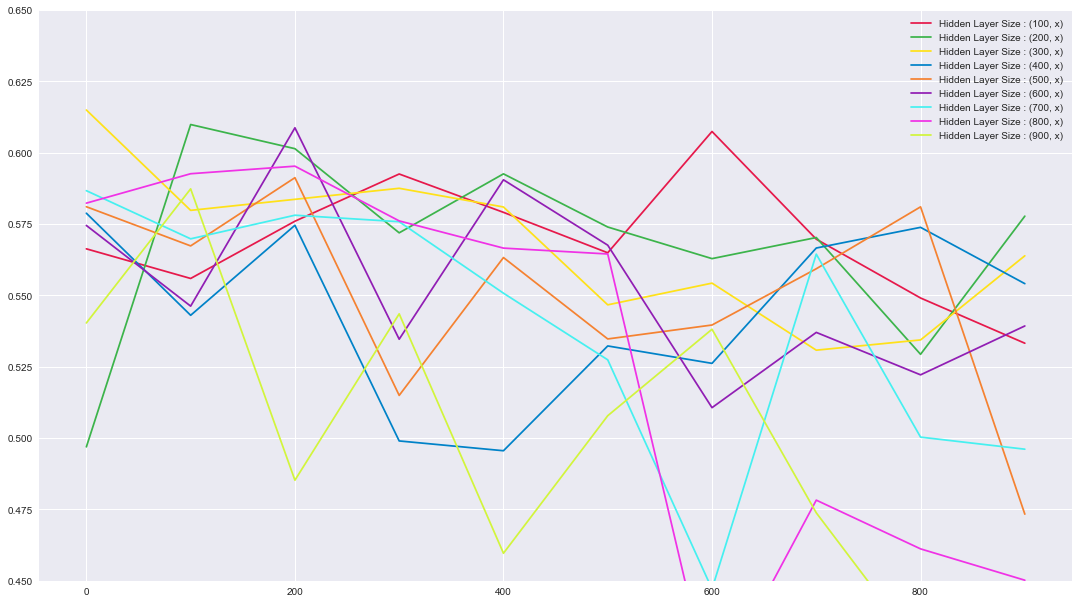

In [27]:
%matplotlib inline

# Affichage des courbes
draw([0.45,0.65], clf, i_max, j_max, ecart_i, ecart_j)


In [10]:
warnings.filterwarnings('ignore')

clf_demo = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(900, 400), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

clf_demo.fit(source_train, cible_train.values.ravel())


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(900, 400), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [11]:
warnings.filterwarnings('ignore')

for i in range(0,20):
    print("prédit : ", clf_demo.predict(source_test.values[i]),"\n attendu : ",cible_test.values[i])


prédit :  ['Se lever (chaise)'] 
 attendu :  ['Se lever (chaise)']
prédit :  ["S'assoir (chaise)"] 
 attendu :  ["S'assoir (chaise)"]
prédit :  ["S'allonger (depuis position debout)"] 
 attendu :  ["S'allonger (depuis position debout)"]
prédit :  ["S'assoir (depuis position allongée)"] 
 attendu :  ['Courrir']
prédit :  ['Sauter'] 
 attendu :  ['Sauter']
prédit :  ['Ne rien faire'] 
 attendu :  ['Ne rien faire']
prédit :  ["S'assoir (chaise)"] 
 attendu :  ["S'assoir (chaise)"]
prédit :  ['Courrir'] 
 attendu :  ['Courrir']
prédit :  ["S'allonger (depuis position debout)"] 
 attendu :  ["S'allonger (depuis position debout)"]
prédit :  ['Sauter'] 
 attendu :  ['Sauter']
prédit :  ['Marcher'] 
 attendu :  ['Marcher']
prédit :  ["S'assoir (depuis position allongée)"] 
 attendu :  ['Se lever (depuis position allongée)']
prédit :  ["S'assoir (chaise)"] 
 attendu :  ["S'assoir (depuis position allongée)"]
prédit :  ["S'allonger (depuis position assise)"] 
 attendu :  ["S'allonger (depuis pos

# Dataset ANALYSE

In [12]:
# récupération des variables qui ont été stockées dans le noteBook "Pré-traitement" (DATASET ANALYSE)
%store -r activity_dataset_analysed
%store -r colonnes_source_analysed
%store -r colonnes_cible_analysed
%store -r source_analysed
%store -r cible_analysed


In [13]:
# cration d'un jeu de données de test et d'entrainement
source_train_analysed, source_test_analysed, cible_train_analysed, cible_test_analysed = train_test_split(source_analysed, cible_analysed, test_size=0.7)


In [14]:
#[print('classe ',i,' : ',sum(cible_train==i)) for i in cible_train.values]

display(pd.Series.value_counts(activity_dataset_analysed['Action']))
display(source_train_analysed, source_test_analysed, cible_train_analysed, cible_test_analysed)


S'assoir (depuis position allongée)    66
Courrir                                60
S'allonger (depuis position assise)    59
Ne rien faire                          57
Marcher                                57
S'allonger (depuis position debout)    56
Sauter                                 56
S'assoir (chaise)                      52
Se lever (depuis position allongée)    51
Se lever (chaise)                      51
Name: Action, dtype: int64

,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,...,t18,t19,t20,Lieux_Ecole,Lieux_Exterieur,Lieux_Maison,moyenne_t,max_t,min_t,ecart_type_t
417,15.370636,14.720627,13.979614,11.219101,10.000458,7.346466,4.967850,3.236832,-0.700424,-4.649658,...,-8.467224,-9.339905,-8.218231,0,0,1,-1.646022,15.370636,-34.554443,12.174545
22,8.317337,9.532379,12.140884,16.701828,16.760483,22.286301,23.378067,12.988403,9.643723,8.293396,...,8.549576,10.062714,9.427048,0,0,1,11.356413,23.378067,6.141006,4.819087
563,-10.757263,-9.037048,-9.829529,-14.833405,-13.910446,-8.215836,-6.298080,-2.354813,1.680603,2.384506,...,10.753433,10.098618,10.946152,0,0,1,1.202962,11.749420,-14.833405,9.626533
344,14.280090,14.393814,14.126862,14.356705,14.185516,14.344742,14.157990,14.336365,14.232193,14.372269,...,14.307617,14.250168,14.330368,0,0,1,14.292481,14.499146,14.126862,0.085260
366,9.246277,10.044754,8.381958,11.563858,9.325287,14.208267,14.781677,3.849731,8.909912,16.108063,...,19.582062,16.755692,8.239502,0,0,1,12.861105,19.582062,3.849731,4.078217
434,8.763840,7.958206,7.359650,6.882019,6.579132,7.555969,10.753433,15.973984,-1.174484,20.363770,...,9.508438,8.560333,9.102631,0,0,1,11.376939,25.063568,-1.174484,6.044667
358,-8.025497,-9.306396,-8.061401,-6.418976,-10.498703,-10.874588,-7.997955,-4.296509,-1.951401,2.459915,...,9.051147,9.844833,11.687180,0,0,1,2.334102,16.894562,-10.874588,10.014317
177,10.667236,11.923004,11.775772,13.558243,18.308319,13.547455,16.167923,14.263321,13.774918,12.365936,...,13.199112,12.953705,12.855530,0,0,1,13.138954,18.308319,10.667236,1.662337
433,-4.977676,-4.017593,-4.522766,-5.311676,-9.040634,-11.080490,-8.104492,-7.156387,5.917145,20.727661,...,13.898209,11.250229,10.128540,0,0,1,6.267594,25.866837,-11.080490,11.958557
176,14.462051,13.066223,13.309235,13.009964,13.001587,12.813629,11.608154,8.290985,13.100937,12.358749,...,13.002777,13.261353,11.919403,0,0,1,13.733549,19.102020,8.290985,2.605102


,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,...,t18,t19,t20,Lieux_Ecole,Lieux_Exterieur,Lieux_Maison,moyenne_t,max_t,min_t,ecart_type_t
402,13.237411,14.406982,13.785675,12.917786,13.910187,14.186722,16.120026,14.545837,11.623734,5.510117,...,11.689560,10.106995,10.982086,0,0,1,12.111122,16.896957,5.510117,2.875777
262,15.829132,14.100525,14.714645,14.545837,11.981659,11.342392,13.355911,16.706604,19.596405,28.526794,...,32.429337,14.731400,14.086166,0,0,1,15.512563,32.429337,-1.958572,7.793316
159,-9.183090,-14.920776,-12.867752,-15.393646,-10.262878,-8.906555,-15.342163,-11.322311,-16.994171,-18.175720,...,-17.252747,-17.891998,-10.550171,1,0,0,-13.105208,-7.180328,-18.175720,3.475861
146,12.025940,9.236710,3.739624,-7.935699,-28.963989,-50.935562,-48.060135,-44.561005,2.767563,-52.908401,...,-39.554733,-78.508392,-36.815765,0,0,1,-27.761015,12.025940,-80.383057,29.479654
542,13.407410,13.938919,14.106506,14.080170,14.043060,13.284103,11.235855,9.240280,7.740326,4.747574,...,-7.292877,-5.563065,-5.807266,0,0,1,3.255746,14.106506,-10.460388,9.445703
507,14.365082,14.241791,13.424164,12.878296,11.774567,11.012009,9.752670,10.899460,13.947296,16.870621,...,13.359512,12.435364,11.920593,0,0,1,13.854161,17.882156,9.752670,2.181770
364,8.899124,10.692383,9.120590,9.415085,8.068329,7.866013,9.580276,9.446198,5.071976,7.657745,...,13.303253,10.108185,8.039612,0,0,1,8.747451,14.725418,3.084808,2.812647
345,14.333969,14.295654,14.323181,14.371063,14.323181,14.280090,14.280090,14.299255,14.207062,14.312408,...,14.259735,14.288467,14.247772,0,0,1,14.284638,14.371063,14.207062,0.040584
56,13.033920,14.076584,14.137650,14.299240,14.365082,13.333176,11.037140,7.624207,7.694855,3.791092,...,-9.512283,-9.341095,-7.241379,0,0,1,2.049133,14.365082,-10.578903,10.014846
407,13.454086,14.053848,14.497971,12.965683,11.006027,10.905457,9.528809,6.504929,4.538086,2.117554,...,-7.143234,-8.810776,-8.825150,0,0,1,-0.696178,14.497971,-38.861618,13.402238


,Action
417,S'allonger (depuis position assise)
22,S'allonger (depuis position debout)
563,S'assoir (depuis position allongée)
344,Ne rien faire
366,Se lever (depuis position allongée)
434,S'assoir (depuis position allongée)
358,Se lever (depuis position allongée)
177,S'assoir (chaise)
433,S'assoir (depuis position allongée)
176,S'assoir (chaise)


,Action
402,S'allonger (depuis position assise)
262,Sauter
159,Marcher
146,Sauter
542,S'allonger (depuis position assise)
507,S'assoir (chaise)
364,Se lever (depuis position allongée)
345,Ne rien faire
56,S'allonger (depuis position assise)
407,S'allonger (depuis position assise)


In [15]:
warnings.filterwarnings('ignore')

# Configuration des paramètres que l'on souhaite tester
tuned_parameters = [{
   'hidden_layer_sizes': hidden_layer_sizes
}]
scores = ['accuracy']


for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf_analysed = GridSearchCV(MLPClassifier(), tuned_parameters, cv=5, scoring=score,verbose=2)
    clf_analysed.fit(source_train_analysed, cible_train_analysed.values.ravel())
    
    
    print("Best parameters set found on development set:")
    print()
    print(clf_analysed.best_estimator_)
    
    print()
    print("Grid scores on development set:")
    print()
    for params, mean_score, scores in clf_analysed.grid_scores_:
          
        print("%0.3f (+/-%0.03f) for %r"
              % (mean_score, scores.std() / 2, params))
    print()
    
    print("Detailed classification report:")
    print()
    cible_true_analysed, cible_pred_analysed = cible_test_analysed, clf_analysed.predict(source_test_analysed)
    print(classification_report(cible_true_analysed, cible_pred_analysed))
    print()

# Tuning hyper-parameters for accuracy

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV] hidden_layer_sizes=(100,) .......................................
[CV] .............................. hidden_layer_sizes=(100,) -   0.1s
[CV] hidden_layer_sizes=(100,) .......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] .............................. hidden_layer_sizes=(100,) -   0.1s
[CV] hidden_layer_sizes=(100,) .......................................
[CV] .............................. hidden_layer_sizes=(100,) -   0.1s
[CV] hidden_layer_sizes=(100,) .......................................
[CV] .............................. hidden_layer_sizes=(100,) -   0.1s
[CV] hidden_layer_sizes=(100,) .......................................
[CV] .............................. hidden_layer_sizes=(100,) -   0.1s
[CV] hidden_layer_sizes=(100, 100) ...................................
[CV] .......................... hidden_layer_sizes=(100, 100) -   0.2s
[CV] hidden_layer_sizes=(100, 100) ...................................
[CV] .......................... hidden_layer_sizes=(100, 100) -   0.0s
[CV] hidden_layer_sizes=(100, 100) ...................................
[CV] .......................... hidden_layer_sizes=(100, 100) -   0.2s
[CV] hidden_layer_sizes=(100, 100) ...................................
[CV] .

[CV] .......................... hidden_layer_sizes=(200, 100) -   0.3s
[CV] hidden_layer_sizes=(200, 200) ...................................
[CV] .......................... hidden_layer_sizes=(200, 200) -   0.3s
[CV] hidden_layer_sizes=(200, 200) ...................................
[CV] .......................... hidden_layer_sizes=(200, 200) -   0.3s
[CV] hidden_layer_sizes=(200, 200) ...................................
[CV] .......................... hidden_layer_sizes=(200, 200) -   0.3s
[CV] hidden_layer_sizes=(200, 200) ...................................
[CV] .......................... hidden_layer_sizes=(200, 200) -   0.3s
[CV] hidden_layer_sizes=(200, 200) ...................................
[CV] .......................... hidden_layer_sizes=(200, 200) -   0.3s
[CV] hidden_layer_sizes=(200, 300) ...................................
[CV] .......................... hidden_layer_sizes=(200, 300) -   0.5s
[CV] hidden_layer_sizes=(200, 300) ...................................
[CV] .

[CV] .......................... hidden_layer_sizes=(300, 300) -   0.6s
[CV] hidden_layer_sizes=(300, 300) ...................................
[CV] .......................... hidden_layer_sizes=(300, 300) -   0.6s
[CV] hidden_layer_sizes=(300, 300) ...................................
[CV] .......................... hidden_layer_sizes=(300, 300) -   0.6s
[CV] hidden_layer_sizes=(300, 400) ...................................
[CV] .......................... hidden_layer_sizes=(300, 400) -   0.1s
[CV] hidden_layer_sizes=(300, 400) ...................................
[CV] .......................... hidden_layer_sizes=(300, 400) -   0.7s
[CV] hidden_layer_sizes=(300, 400) ...................................
[CV] .......................... hidden_layer_sizes=(300, 400) -   0.7s
[CV] hidden_layer_sizes=(300, 400) ...................................
[CV] .......................... hidden_layer_sizes=(300, 400) -   0.7s
[CV] hidden_layer_sizes=(300, 400) ...................................
[CV] .

[CV] .......................... hidden_layer_sizes=(400, 500) -   1.1s
[CV] hidden_layer_sizes=(400, 500) ...................................
[CV] .......................... hidden_layer_sizes=(400, 500) -   1.2s
[CV] hidden_layer_sizes=(400, 500) ...................................
[CV] .......................... hidden_layer_sizes=(400, 500) -   0.1s
[CV] hidden_layer_sizes=(400, 500) ...................................
[CV] .......................... hidden_layer_sizes=(400, 500) -   1.2s
[CV] hidden_layer_sizes=(400, 500) ...................................
[CV] .......................... hidden_layer_sizes=(400, 500) -   1.2s
[CV] hidden_layer_sizes=(400, 600) ...................................
[CV] .......................... hidden_layer_sizes=(400, 600) -   1.9s
[CV] hidden_layer_sizes=(400, 600) ...................................
[CV] .......................... hidden_layer_sizes=(400, 600) -   1.4s
[CV] hidden_layer_sizes=(400, 600) ...................................
[CV] .

[CV] .......................... hidden_layer_sizes=(500, 600) -   1.7s
[CV] hidden_layer_sizes=(500, 700) ...................................
[CV] .......................... hidden_layer_sizes=(500, 700) -   0.1s
[CV] hidden_layer_sizes=(500, 700) ...................................
[CV] .......................... hidden_layer_sizes=(500, 700) -   1.8s
[CV] hidden_layer_sizes=(500, 700) ...................................
[CV] .......................... hidden_layer_sizes=(500, 700) -   0.1s
[CV] hidden_layer_sizes=(500, 700) ...................................
[CV] .......................... hidden_layer_sizes=(500, 700) -   1.9s
[CV] hidden_layer_sizes=(500, 700) ...................................
[CV] .......................... hidden_layer_sizes=(500, 700) -   1.9s
[CV] hidden_layer_sizes=(500, 800) ...................................
[CV] .......................... hidden_layer_sizes=(500, 800) -   2.9s
[CV] hidden_layer_sizes=(500, 800) ...................................
[CV] .

[CV] .......................... hidden_layer_sizes=(600, 800) -   0.2s
[CV] hidden_layer_sizes=(600, 800) ...................................
[CV] .......................... hidden_layer_sizes=(600, 800) -   2.1s
[CV] hidden_layer_sizes=(600, 800) ...................................
[CV] .......................... hidden_layer_sizes=(600, 800) -   0.3s
[CV] hidden_layer_sizes=(600, 900) ...................................
[CV] .......................... hidden_layer_sizes=(600, 900) -   3.5s
[CV] hidden_layer_sizes=(600, 900) ...................................
[CV] .......................... hidden_layer_sizes=(600, 900) -   2.8s
[CV] hidden_layer_sizes=(600, 900) ...................................
[CV] .......................... hidden_layer_sizes=(600, 900) -   0.3s
[CV] hidden_layer_sizes=(600, 900) ...................................
[CV] .......................... hidden_layer_sizes=(600, 900) -   0.2s
[CV] hidden_layer_sizes=(600, 900) ...................................
[CV] .

[CV] .............................. hidden_layer_sizes=(800,) -   0.4s
[CV] hidden_layer_sizes=(800,) .......................................
[CV] .............................. hidden_layer_sizes=(800,) -   0.4s
[CV] hidden_layer_sizes=(800,) .......................................
[CV] .............................. hidden_layer_sizes=(800,) -   0.4s
[CV] hidden_layer_sizes=(800,) .......................................
[CV] .............................. hidden_layer_sizes=(800,) -   0.4s
[CV] hidden_layer_sizes=(800, 100) ...................................
[CV] .......................... hidden_layer_sizes=(800, 100) -   0.7s
[CV] hidden_layer_sizes=(800, 100) ...................................
[CV] .......................... hidden_layer_sizes=(800, 100) -   0.7s
[CV] hidden_layer_sizes=(800, 100) ...................................
[CV] .......................... hidden_layer_sizes=(800, 100) -   0.7s
[CV] hidden_layer_sizes=(800, 100) ...................................
[CV] .

[CV] .......................... hidden_layer_sizes=(900, 100) -   0.8s
[CV] hidden_layer_sizes=(900, 200) ...................................
[CV] .......................... hidden_layer_sizes=(900, 200) -   1.2s
[CV] hidden_layer_sizes=(900, 200) ...................................
[CV] .......................... hidden_layer_sizes=(900, 200) -   1.3s
[CV] hidden_layer_sizes=(900, 200) ...................................
[CV] .......................... hidden_layer_sizes=(900, 200) -   0.1s
[CV] hidden_layer_sizes=(900, 200) ...................................
[CV] .......................... hidden_layer_sizes=(900, 200) -   1.3s
[CV] hidden_layer_sizes=(900, 200) ...................................
[CV] .......................... hidden_layer_sizes=(900, 200) -   1.2s
[CV] hidden_layer_sizes=(900, 300) ...................................
[CV] .......................... hidden_layer_sizes=(900, 300) -   2.0s
[CV] hidden_layer_sizes=(900, 300) ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:  6.0min finished


Best parameters set found on development set:

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(200, 300), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

Grid scores on development set:

0.669 (+/-0.024) for {'hidden_layer_sizes': (100,)}
0.663 (+/-0.039) for {'hidden_layer_sizes': (100, 100)}
0.692 (+/-0.018) for {'hidden_layer_sizes': (100, 200)}
0.639 (+/-0.031) for {'hidden_layer_sizes': (100, 300)}
0.692 (+/-0.010) for {'hidden_layer_sizes': (100, 400)}
0.651 (+/-0.024) for {'hidden_layer_sizes': (100, 500)}
0.686 (+/-0.028) for {'hidden_layer_sizes': (100, 600)}
0.651 (+/-0.025) for {'hidden_layer_sizes': (100, 700)}
0.621 (+/-0.018) for {'hidden_layer_s

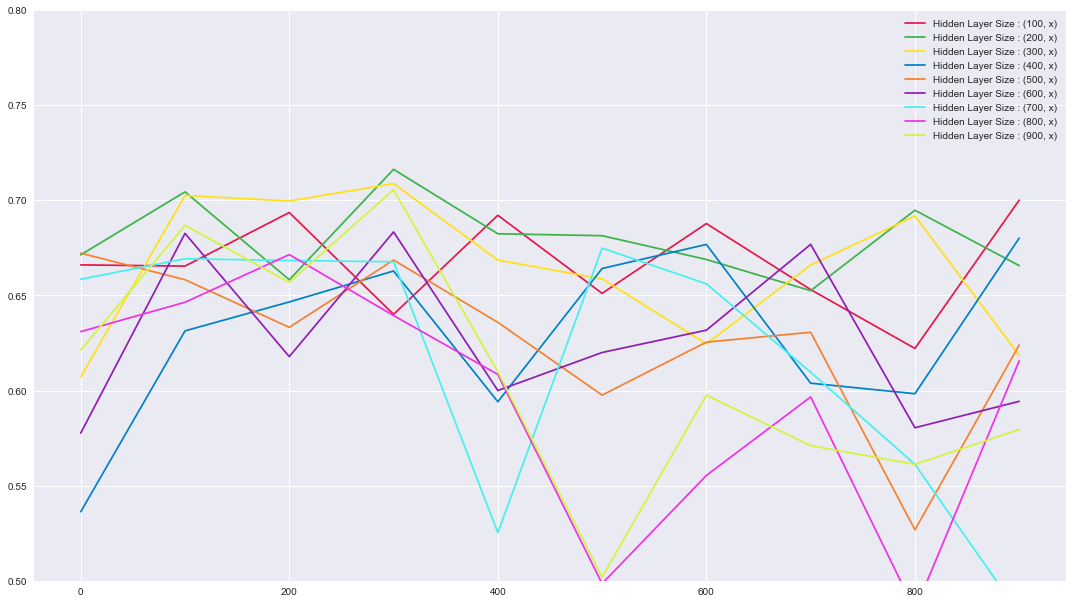

In [28]:
%matplotlib inline

# Affichage des courbes
draw([0.5,0.8], clf_analysed, i_max, j_max, ecart_i, ecart_j)


In [17]:
# TODO copier coller le best classifier
clf_analysed_demo = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(400, 400), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

clf_analysed_demo.fit(source_train_analysed, cible_train_analysed.values.ravel())



MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(400, 400), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [18]:

for i in range(0,20):
    print("prédit : ", clf_analysed_demo.predict(source_test_analysed.values[i]),"\n attendu : ",cible_test_analysed.values[i])


prédit :  ["S'allonger (depuis position assise)"] 
 attendu :  ["S'allonger (depuis position assise)"]
prédit :  ["S'allonger (depuis position assise)"] 
 attendu :  ['Sauter']
prédit :  ['Marcher'] 
 attendu :  ['Marcher']
prédit :  ['Sauter'] 
 attendu :  ['Sauter']
prédit :  ["S'allonger (depuis position assise)"] 
 attendu :  ["S'allonger (depuis position assise)"]
prédit :  ["S'assoir (chaise)"] 
 attendu :  ["S'assoir (chaise)"]
prédit :  ['Marcher'] 
 attendu :  ['Se lever (depuis position allongée)']
prédit :  ['Ne rien faire'] 
 attendu :  ['Ne rien faire']
prédit :  ["S'allonger (depuis position assise)"] 
 attendu :  ["S'allonger (depuis position assise)"]
prédit :  ["S'allonger (depuis position assise)"] 
 attendu :  ["S'allonger (depuis position assise)"]
prédit :  ['Sauter'] 
 attendu :  ['Sauter']
prédit :  ['Se lever (depuis position allongée)'] 
 attendu :  ['Courrir']
prédit :  ['Marcher'] 
 attendu :  ['Marcher']
prédit :  ["S'assoir (depuis position allongée)"] 
 at


# Dataset ANALYSE 2

In [19]:

# Récupération des données analysé sans les données brutes (DONNEES ANALYSEES 2)
%store -r colonnes_source_analysed_2
%store -r colonnes_cible_analysed_2
%store -r source_analysed_2
%store -r cible_analysed_2


In [20]:
# cration d'un jeu de données de test et d'entrainement
source_train_analysed_2, source_test_analysed_2, cible_train_analysed_2, cible_test_analysed_2 = train_test_split(source_analysed_2, cible_analysed_2, test_size=0.7)


In [21]:
#[print('classe ',i,' : ',sum(cible_train==i)) for i in cible_train.values]

display(pd.Series.value_counts(activity_dataset_analysed['Action']))
display(source_train_analysed_2, source_test_analysed_2, cible_train_analysed_2, cible_test_analysed_2)


S'assoir (depuis position allongée)    66
Courrir                                60
S'allonger (depuis position assise)    59
Ne rien faire                          57
Marcher                                57
S'allonger (depuis position debout)    56
Sauter                                 56
S'assoir (chaise)                      52
Se lever (depuis position allongée)    51
Se lever (chaise)                      51
Name: Action, dtype: int64

,Lieux_Ecole,Lieux_Exterieur,Lieux_Maison,moyenne_t,max_t,min_t,ecart_type_t
178,0,0,1,13.455286,18.705780,10.978485,1.978914
284,0,0,1,11.493837,20.443970,-2.054352,5.163045
47,0,0,1,13.593850,17.165100,10.089035,1.927733
441,0,0,1,0.537193,12.820816,-13.618332,10.377188
191,0,0,1,13.153079,17.371002,11.442963,1.588822
259,0,0,1,15.234539,36.637161,-0.101883,8.964207
476,0,0,1,4.394071,17.543381,-18.941864,11.511808
132,0,0,1,-11.053437,18.225739,-59.881516,22.076664
538,0,0,1,2.258085,16.788025,-19.292603,12.687778
250,0,0,1,14.218081,28.273010,-1.764664,7.775748


,Lieux_Ecole,Lieux_Exterieur,Lieux_Maison,moyenne_t,max_t,min_t,ecart_type_t
111,0,1,0,-5.191652,4.900803,-35.516922,11.445625
212,0,0,1,11.948199,14.943283,9.672455,1.311159
73,0,0,1,12.587627,15.335922,10.910248,1.225547
200,0,0,1,13.280751,17.768448,10.219528,1.926504
474,0,0,1,3.166801,16.407333,-25.316422,13.640110
379,0,0,1,-1.005871,20.794708,-13.190979,10.493306
394,0,0,1,11.364253,25.189270,2.523361,6.185229
171,0,0,1,13.808488,15.935684,12.325226,1.085640
526,0,0,1,-0.517815,38.758408,-48.045776,29.055265
251,0,0,1,13.295473,53.388184,-13.711716,15.460282


,Action
178,S'assoir (chaise)
284,S'allonger (depuis position debout)
47,S'assoir (depuis position allongée)
441,S'assoir (depuis position allongée)
191,S'assoir (chaise)
259,Sauter
476,S'allonger (depuis position debout)
132,Sauter
538,S'allonger (depuis position debout)
250,Sauter


,Action
111,Sauter
212,Se lever (chaise)
73,Marcher
200,S'assoir (chaise)
474,S'allonger (depuis position debout)
379,Se lever (depuis position allongée)
394,Se lever (depuis position allongée)
171,S'assoir (chaise)
526,Courrir
251,Sauter


In [22]:
warnings.filterwarnings('ignore')

# Configuration des paramètres que l'on souhaite tester
tuned_parameters = [{
   'hidden_layer_sizes': hidden_layer_sizes
}]
scores = ['accuracy']


for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf_analysed_2 = GridSearchCV(MLPClassifier(), tuned_parameters, cv=5, scoring=score,verbose=2)
    clf_analysed_2.fit(source_train_analysed_2, cible_train_analysed_2.values.ravel())
    
    
    print("Best parameters set found on development set:")
    print()
    print(clf_analysed_2.best_estimator_)
    
    print()
    print("Grid scores on development set:")
    print()
    for params, mean_score, scores in clf_analysed_2.grid_scores_:
          
        print("%0.3f (+/-%0.03f) for %r"
              % (mean_score, scores.std() / 2, params))
    print()
    
    print("Detailed classification report:")
    print()
    cible_true_analysed_2, cible_pred_analysed_2 = cible_test_analysed_2, clf_analysed_2.predict(source_test_analysed_2)
    print(classification_report(cible_true_analysed_2, cible_pred_analysed_2))
    
    
    print()
    
    

# Tuning hyper-parameters for accuracy

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV] hidden_layer_sizes=(100,) .......................................
[CV] .............................. hidden_layer_sizes=(100,) -   0.1s
[CV] hidden_layer_sizes=(100,) .......................................
[CV] .............................. hidden_layer_sizes=(100,) -   0.1s
[CV] hidden_layer_sizes=(100,) .......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] .............................. hidden_layer_sizes=(100,) -   0.1s
[CV] hidden_layer_sizes=(100,) .......................................
[CV] .............................. hidden_layer_sizes=(100,) -   0.1s
[CV] hidden_layer_sizes=(100,) .......................................
[CV] .............................. hidden_layer_sizes=(100,) -   0.1s
[CV] hidden_layer_sizes=(100, 100) ...................................
[CV] .......................... hidden_layer_sizes=(100, 100) -   0.2s
[CV] hidden_layer_sizes=(100, 100) ...................................
[CV] .......................... hidden_layer_sizes=(100, 100) -   0.2s
[CV] hidden_layer_sizes=(100, 100) ...................................
[CV] .......................... hidden_layer_sizes=(100, 100) -   0.2s
[CV] hidden_layer_sizes=(100, 100) ...................................
[CV] .......................... hidden_layer_sizes=(100, 100) -   0.2s
[CV] hidden_layer_sizes=(100, 100) ...................................
[CV] .

[CV] .......................... hidden_layer_sizes=(200, 200) -   0.3s
[CV] hidden_layer_sizes=(200, 200) ...................................
[CV] .......................... hidden_layer_sizes=(200, 200) -   0.3s
[CV] hidden_layer_sizes=(200, 200) ...................................
[CV] .......................... hidden_layer_sizes=(200, 200) -   0.3s
[CV] hidden_layer_sizes=(200, 200) ...................................
[CV] .......................... hidden_layer_sizes=(200, 200) -   0.3s
[CV] hidden_layer_sizes=(200, 200) ...................................
[CV] .......................... hidden_layer_sizes=(200, 200) -   0.3s
[CV] hidden_layer_sizes=(200, 300) ...................................
[CV] .......................... hidden_layer_sizes=(200, 300) -   0.4s
[CV] hidden_layer_sizes=(200, 300) ...................................
[CV] .......................... hidden_layer_sizes=(200, 300) -   0.4s
[CV] hidden_layer_sizes=(200, 300) ...................................
[CV] .

[CV] .......................... hidden_layer_sizes=(300, 300) -   0.5s
[CV] hidden_layer_sizes=(300, 300) ...................................
[CV] .......................... hidden_layer_sizes=(300, 300) -   0.6s
[CV] hidden_layer_sizes=(300, 400) ...................................
[CV] .......................... hidden_layer_sizes=(300, 400) -   0.7s
[CV] hidden_layer_sizes=(300, 400) ...................................
[CV] .......................... hidden_layer_sizes=(300, 400) -   0.7s
[CV] hidden_layer_sizes=(300, 400) ...................................
[CV] .......................... hidden_layer_sizes=(300, 400) -   0.7s
[CV] hidden_layer_sizes=(300, 400) ...................................
[CV] .......................... hidden_layer_sizes=(300, 400) -   0.7s
[CV] hidden_layer_sizes=(300, 400) ...................................
[CV] .......................... hidden_layer_sizes=(300, 400) -   0.9s
[CV] hidden_layer_sizes=(300, 500) ...................................
[CV] .

[CV] .......................... hidden_layer_sizes=(400, 500) -   1.2s
[CV] hidden_layer_sizes=(400, 500) ...................................
[CV] .......................... hidden_layer_sizes=(400, 500) -   1.1s
[CV] hidden_layer_sizes=(400, 500) ...................................
[CV] .......................... hidden_layer_sizes=(400, 500) -   1.1s
[CV] hidden_layer_sizes=(400, 500) ...................................
[CV] .......................... hidden_layer_sizes=(400, 500) -   0.1s
[CV] hidden_layer_sizes=(400, 600) ...................................
[CV] .......................... hidden_layer_sizes=(400, 600) -   1.9s
[CV] hidden_layer_sizes=(400, 600) ...................................
[CV] .......................... hidden_layer_sizes=(400, 600) -   1.4s
[CV] hidden_layer_sizes=(400, 600) ...................................
[CV] .......................... hidden_layer_sizes=(400, 600) -   0.1s
[CV] hidden_layer_sizes=(400, 600) ...................................
[CV] .

[CV] .......................... hidden_layer_sizes=(500, 600) -   1.8s
[CV] hidden_layer_sizes=(500, 700) ...................................
[CV] .......................... hidden_layer_sizes=(500, 700) -   2.3s
[CV] hidden_layer_sizes=(500, 700) ...................................
[CV] .......................... hidden_layer_sizes=(500, 700) -   1.8s
[CV] hidden_layer_sizes=(500, 700) ...................................
[CV] .......................... hidden_layer_sizes=(500, 700) -   1.8s
[CV] hidden_layer_sizes=(500, 700) ...................................
[CV] .......................... hidden_layer_sizes=(500, 700) -   1.6s
[CV] hidden_layer_sizes=(500, 700) ...................................
[CV] .......................... hidden_layer_sizes=(500, 700) -   1.3s
[CV] hidden_layer_sizes=(500, 800) ...................................
[CV] .......................... hidden_layer_sizes=(500, 800) -   2.4s
[CV] hidden_layer_sizes=(500, 800) ...................................
[CV] .

[CV] .......................... hidden_layer_sizes=(600, 800) -   2.5s
[CV] hidden_layer_sizes=(600, 800) ...................................
[CV] .......................... hidden_layer_sizes=(600, 800) -   2.3s
[CV] hidden_layer_sizes=(600, 800) ...................................
[CV] .......................... hidden_layer_sizes=(600, 800) -   2.5s
[CV] hidden_layer_sizes=(600, 900) ...................................
[CV] .......................... hidden_layer_sizes=(600, 900) -   2.7s
[CV] hidden_layer_sizes=(600, 900) ...................................
[CV] .......................... hidden_layer_sizes=(600, 900) -   2.2s
[CV] hidden_layer_sizes=(600, 900) ...................................
[CV] .......................... hidden_layer_sizes=(600, 900) -   0.1s
[CV] hidden_layer_sizes=(600, 900) ...................................
[CV] .......................... hidden_layer_sizes=(600, 900) -   0.2s
[CV] hidden_layer_sizes=(600, 900) ...................................
[CV] .

[CV] .............................. hidden_layer_sizes=(800,) -   0.3s
[CV] hidden_layer_sizes=(800,) .......................................
[CV] .............................. hidden_layer_sizes=(800,) -   0.3s
[CV] hidden_layer_sizes=(800,) .......................................
[CV] .............................. hidden_layer_sizes=(800,) -   0.3s
[CV] hidden_layer_sizes=(800,) .......................................
[CV] .............................. hidden_layer_sizes=(800,) -   0.3s
[CV] hidden_layer_sizes=(800,) .......................................
[CV] .............................. hidden_layer_sizes=(800,) -   0.3s
[CV] hidden_layer_sizes=(800, 100) ...................................
[CV] .......................... hidden_layer_sizes=(800, 100) -   0.6s
[CV] hidden_layer_sizes=(800, 100) ...................................
[CV] .......................... hidden_layer_sizes=(800, 100) -   0.6s
[CV] hidden_layer_sizes=(800, 100) ...................................
[CV] .

[CV] .......................... hidden_layer_sizes=(900, 100) -   0.7s
[CV] hidden_layer_sizes=(900, 100) ...................................
[CV] .......................... hidden_layer_sizes=(900, 100) -   0.7s
[CV] hidden_layer_sizes=(900, 200) ...................................
[CV] .......................... hidden_layer_sizes=(900, 200) -   1.1s
[CV] hidden_layer_sizes=(900, 200) ...................................
[CV] .......................... hidden_layer_sizes=(900, 200) -   0.9s
[CV] hidden_layer_sizes=(900, 200) ...................................
[CV] .......................... hidden_layer_sizes=(900, 200) -   1.1s
[CV] hidden_layer_sizes=(900, 200) ...................................
[CV] .......................... hidden_layer_sizes=(900, 200) -   1.1s
[CV] hidden_layer_sizes=(900, 200) ...................................
[CV] .......................... hidden_layer_sizes=(900, 200) -   1.0s
[CV] hidden_layer_sizes=(900, 300) ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:  9.0min finished


Best parameters set found on development set:

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(900, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

Grid scores on development set:

0.521 (+/-0.038) for {'hidden_layer_sizes': (100,)}
0.586 (+/-0.023) for {'hidden_layer_sizes': (100, 100)}
0.515 (+/-0.070) for {'hidden_layer_sizes': (100, 200)}
0.568 (+/-0.024) for {'hidden_layer_sizes': (100, 300)}
0.574 (+/-0.020) for {'hidden_layer_sizes': (100, 400)}
0.515 (+/-0.040) for {'hidden_layer_sizes': (100, 500)}
0.503 (+/-0.058) for {'hidden_layer_sizes': (100, 600)}
0.550 (+/-0.035) for {'hidden_layer_sizes': (100, 700)}
0.568 (+/-0.015) for {'hidden_layer_s

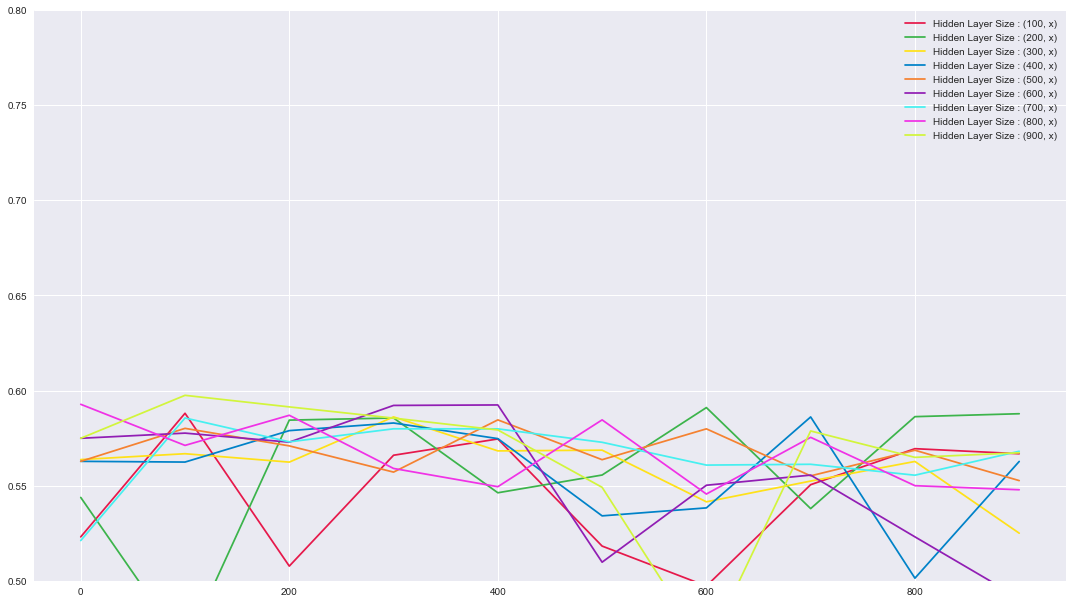

In [23]:
%matplotlib inline

# Affichage des courbes
draw([0.50,0.80], clf_analysed_2, i_max, j_max, ecart_i, ecart_j)


In [24]:
# TODO copier coller le best classifier
clf_analysed_2_demo = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(95, 71), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

clf_analysed_2_demo.fit(source_train_analysed_2, cible_train_analysed_2.values.ravel())



MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(95, 71), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [25]:

for i in range(0,20):
    print("prédit : ", clf_analysed_2_demo.predict(source_test_analysed_2.values[i]),"\n attendu : ",cible_test_analysed_2.values[i])


prédit :  ['Sauter'] 
 attendu :  ['Sauter']
prédit :  ["S'assoir (chaise)"] 
 attendu :  ['Se lever (chaise)']
prédit :  ["S'assoir (chaise)"] 
 attendu :  ['Marcher']
prédit :  ["S'assoir (chaise)"] 
 attendu :  ["S'assoir (chaise)"]
prédit :  ["S'allonger (depuis position debout)"] 
 attendu :  ["S'allonger (depuis position debout)"]
prédit :  ["S'assoir (depuis position allongée)"] 
 attendu :  ['Se lever (depuis position allongée)']
prédit :  ['Se lever (depuis position allongée)'] 
 attendu :  ['Se lever (depuis position allongée)']
prédit :  ['Ne rien faire'] 
 attendu :  ["S'assoir (chaise)"]
prédit :  ["S'allonger (depuis position assise)"] 
 attendu :  ['Courrir']
prédit :  ['Sauter'] 
 attendu :  ['Sauter']
prédit :  ["S'assoir (chaise)"] 
 attendu :  ['Se lever (chaise)']
prédit :  ['Courrir'] 
 attendu :  ["S'allonger (depuis position assise)"]
prédit :  ['Se lever (chaise)'] 
 attendu :  ["S'assoir (chaise)"]
prédit :  ['Sauter'] 
 attendu :  ["S'allonger (depuis position